### Tarea 3 del curso CM-072

* Nombre y apellidos: Luis Vasquez Espinoza
* Fecha de presentación: 27 de setiembre

Esta tarea utiliza un pequeño subconjunto de los datos de la competencia de Kaggle  [Yelp Business Rating Prediction ](https://www.kaggle.com/c/yelp-recsys-2013).

* Descripción de la data
    - `yelp.json` es el formato original del archivo y `yelp.csv` contiene los mismos datos, en un formato más conveniente. Ambos archivos están en esta carpeta de la tarea, por lo que no es necesario descargar los datos del sitio web de Kaggle.


## Preguntas

1. Lee yelp.csv en un DataFrame.

In [2]:
# Tu solución

import pandas as pd

yelp_df = pd.read_csv("yelp.csv")
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


2. Crea un nuevo DataFrame que solo contenga las reseñas de 5 estrellas y 1 estrella.

In [3]:
# Tu solucion
new_df = yelp_df.loc[(yelp_df.stars == 1) | (yelp_df.stars == 5)]
print(new_df.stars.unique())
new_df.sample(4)

[5 1]


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
3879,L9UYbtAUOcfTgZFimehlXw,2010-05-10,d4xvZqNV6UpeXx8IwQkIhQ,5,"Finally, a great place to get breakfast that i...",review,_y4Pa5ZFpz4ycpqevBr-gw,0,0,0
562,F-ZOeAK1v7e5Rt2Mv5rVMw,2010-09-22,6BVDp3xFEJr7vgHyWyFr6g,5,"Okay I have found my new favorite ""home office...",review,WEuIqh8ygm-bH81s8lwD0g,11,15,5
8956,ShUSw5yD7EFWBOiq_CuHMQ,2010-03-16,3cnyJU2lCKG4qc3zatEslA,5,I took my computer to RedSeven recently when m...,review,TxOR39w0Mlbd4h1siXyb_w,2,3,1
3315,jRfdz5voj40P6WS9L54caw,2011-09-16,2gfW7UgSeSAkxTXT60Ye_w,5,I've been meaning to try this place for months...,review,Ygda3eaZvqGTguTJLTZp5A,0,0,0


3. Divide el nuevo DataFrame en conjuntos de entrenamiento y prueba, usando el texto de revisión como la única característica y la calificación de estrellas como respuesta.

In [4]:
# Tu solucion
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df.text, new_df.stars, random_state=123)

4. Usa `CountVectorizer` para crear [matrices de términos de documentos](https://en.wikipedia.org/wiki/Document-term_matrix) de `X_entrenamiento` y `X_prueba`.


In [5]:
# Tu solucion
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train_term_matrix = cv.fit_transform(X_train)
X_test_term_matrix = cv.transform(X_test)

5. Usa Naive Bayes para predecir la calificación de estrellas para las revisiones en el conjunto de prueba y calcula la precisión.

In [6]:
# Tu solucion
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

m_naive_bayes = MultinomialNB()
m_naive_bayes.fit(X_train_term_matrix, y_train)

# Calculando presicion
print (accuracy_score(y_test, m_naive_bayes.predict(X_test_term_matrix)))

0.9099804305283757


6. Calcula el AUC.

In [7]:
# Tu solucion

# Nota: De la documentacion: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
# Se explica que el metodo 'roc_auc_score()' solo se usa para clasificacion binaria o
# clasificacion multiclase en formato 'label indicator'
# Se tendra que pasar 'y_test' a binario:

import numpy as np
from sklearn.metrics import roc_auc_score

y_test_bin = np.floor(y_test/5)

# Revisemos el orden en el que se almacenaran las probs. de prediccion del clasificador de bayes
print("Orden de las clases: ", m_naive_bayes.classes_)
# Observamos que el positivo en binario que prepare (el '5') esta en la segunda columna
# Columna que utilizaremos para el score

predicted_prob = m_naive_bayes.predict_proba(X_test_term_matrix)[:, 1]
print("ROC AUC score: ", roc_auc_score(y_test_bin, predicted_prob))

Orden de las clases:  [1 5]
ROC AUC score:  0.9410858359480054


7. Dibuja la curva ROC.

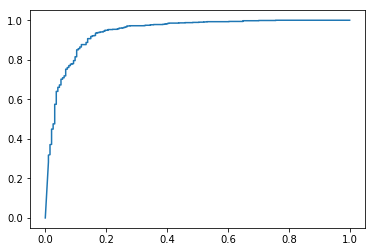

In [15]:
# Tu solucion
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

%matplotlib inline

fpr, tpr, _ = roc_curve(y_test_bin, predicted_prob)
plt.plot(fpr, tpr)
plt.show()

8. Imprime la matriz de confusión y calcule la sensibilidad y especificidad. Comenta tus resultados.

In [9]:
# Tu solucion
from sklearn.metrics import confusion_matrix
y_predicted = m_naive_bayes.predict(X_test_term_matrix)

# Matriz de confusion
cf_mat = confusion_matrix(y_test, y_predicted)
print("Matriz de confusion:\n", cf_mat)

# Sensibilidad
print("Sensibilidad:", cf_mat[1,1]/(cf_mat[1,0] + cf_mat[1,1]))

# Especificidad
print("Especificidad:", cf_mat[0,0]/(cf_mat[0,0] + cf_mat[0,1]))

Matriz de confusion:
 [[118  76]
 [ 16 812]]
Sensibilidad: 0.9806763285024155
Especificidad: 0.6082474226804123


* **De la sensibilidad:** Al parecer la clasificación es bastante acertada, el ~98% de las entradas positivas es correctamente clasificada; es decir, se puede captar los comentarios ligados a un buen *review* con un número de estrellas igual a 5. Además, parece que  no hubo problema de overfitting.

* **De la especificidad:** Me preocupa que el valor de este campo sea muy bajo debido a la falta de otros *features* en la data de entrenamiento, pero ~60% de falsos bien clasificados (1 estrella) puede evidenciar la ocurrencia dispersa de ciertas palabras; es decir, puede que para los positivos (5 estrellas) se capte correctamente cierto patrón, pero para los negocios con 1 estrella se tengan ocurrencias poco útiles para decir que ese negocio es malo.

9. (Obligatorio) Examina el texto de la revisión para ver algunos de los falsos positivos y falsos negativos. Según tu conocimiento de cómo funciona Naive Bayes, ¿tienes alguna teoría sobre por qué el modelo clasifica incorrectamente estas evaluaciones?.

In [10]:
# Tu solucion
# Falso positivo
print("==============================")
print("Falso positivo: \n==============================\n",X_test[y_test < y_predicted][1297])
# Falso negativo
print("==============================")
print("Falso negativo: \n==============================\n",X_test[y_test > y_predicted][8083])


Falso positivo: 
 I dined at this restaurant on a Saturday morning and was actually the very first guest.  I got greeted by the hostess and was promptly seated.  The service was phenomenal from when I walked over the door step and the ambiance is the restaurant was amazing .  I ordered the smoked salmon as an appetizer and the daily scallop special as the entree.

When my salmon dish came out I said to my self "WHAT in the hell?" Two extremely thin slices of salmon, little salad, and a piece of bread with some aioli on the side.  Salmons cheap and they charged me $15 for this crap?  I work in the food industry and the food was crap.

Next, the entree.  The waiter described the the scallop dish like it was heaven on earth.  Explaining to me how delicious this special was.  So I took his advice and ordered.  When the dish came out I said to my self again "What in the HELL?"  Four small scallops, 2 baby carrots, broccoli rabe, and cilantro sauce.  The scallops weren't seared enough, the b

Considero que el problema de NaiveBayes es asumir que las palabras no tienen contexto; es decir, que la probabilidad de que una palabra arbitraria evidencie un buen (o mal) servicio no dependa de sus palabras vecinas. Tomando por ejemplo la primera reseña (falso positivo), encontramos palabra como *greeted, phenomenal, cheap & better* que dependiendo que por separado pueden tener un peso positivo, pero si asociamos lo *cheap* con algo 'corriente' se cambia la idea en función al contexto.

10. Imaginemos que deseas equilibrar la sensibilidad y la especificidad. Puedes lograr esto cambiando el umbral para predecir una revisión de 5 estrellas. ¿Qué umbral equilibra aproximadamente la sensibilidad y la especificidad?.

Sugerencia: Leer-->[Classification vs. Prediction](http://www.fharrell.com/post/classification/).

In [11]:
# Tu solucion
# Me imagino que cuando usted pide "equilibrar" las metricas de la matriz de confusion espera que de alguna manera se
# muevan falsos positivos a negativos correctamente clasificados, y falsos negativos a positivos correctamente clasificados
# Cambiar el umbral de supone asignar nuevas probabilidades a encontrar un "1" o un "5" YA HECHO EL AJUSTE

margen = 0.995 # <--- moviendo este numerito hasta mejorar ambos
y_pred_class = np.where(predicted_prob > margen, 5, 1)

new_cf_mat = confusion_matrix(y_test, y_pred_class)
print("Matriz de confusion:\n", new_cf_mat)

# Sensibilidad
print("Sensibilidad:", new_cf_mat[1,1]/(new_cf_mat[1,0] + new_cf_mat[1,1]))

# Especificidad
print("Especificidad:", new_cf_mat[0,0]/(new_cf_mat[0,0] + new_cf_mat[0,1]))

Matriz de confusion:
 [[167  27]
 [ 83 745]]
Sensibilidad: 0.8997584541062802
Especificidad: 0.8608247422680413


11. (Obligatorio) Veamos qué tan bien se comporta Naive Bayes cuando se incluyen todas las revisiones, en lugar de solo reseñas de 1 estrella y 5 estrellas:

    * Define X e y usando el DataFrame original del paso 1 (debe contener 5 clases diferentes).
    * Divide los datos en conjuntos de entrenamiento y prueba.
    * Calcula la precisión de prueba de un modelo de Naive Bayes.
    * Compara la precisión de la prueba con la precisión nula.
    * Muestra la matriz de confusión.
    * Comenta los resultados.

0.4912
Prueba nula: 0.3337 vs 0.4912
[[ 55  18  18  68  15]
 [ 24  12  48 136  29]
 [  3   6  39 268  33]
 [ 10   1  23 642 231]
 [  4   0   4 333 480]]


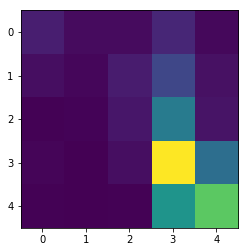

In [18]:
# Tu solucion
# A. Define X e y usando el DataFrame original del paso 1 (debe contener 5 clases diferentes)
X = yelp_df.text
y = yelp_df.stars

# B. Divide los datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# C. Calcula la precisión de prueba de un modelo de Naive Bayes.
new_X_train_term_matrix = cv.fit_transform(X_train)
new_X_test_term_matrix = cv.transform(X_test)

m_naive_bayes.fit(new_X_train_term_matrix, y_train)
y_predicted = m_naive_bayes.predict(new_X_test_term_matrix)
print(accuracy_score(y_test, y_predicted))

# D. Compara la precisión de la prueba con la precisión nula.
print("Prueba nula:", np.floor(y/5).mean(), "vs", accuracy_score(y_test, y_predicted))

# E. Muestra la matriz de confusión
conf_mat = confusion_matrix(y_test, y_predicted)
print (conf_mat)
plt.imshow(conf_mat)

Como se puede observar mejor al plotear la matriz de confusión, las clasificaciones correctas ocurren para las calificaciones altas (4 y 5 estrellas). Ya no se puede hacer un equilibrio de probabilidades como se intentó antes al tener 5 clases y descartar el análisis binario, por lo que lo más acertado sería aplicar el modelo solo para identificar la relacion *reseña* vs *buena calificación*, mapeando la clase **1** a las un número de estrellas en $\{4, 5\}$

12. (Obligatorio) Lee el siguiente artículo de Paul Graham: [A Plan for Spam](http://www.paulgraham.com/spam.html) y responde las siguientes preguntas:

    * ¿Debería un filtro de spam optimizar la sensibilidad o la especificidad, en opinión de Graham?.
    * Antes de probar el "enfoque estadístico" para el filtrado de spam, ¿cuál era su enfoque?.
    * ¿Cuáles son los componentes clave de su sistema de filtrado estadístico? En otras palabras, ¿cómo funciona?.
    * ¿Qué menciona Graham sobre los beneficios del enfoque estadístico?.
    * ¿Qué tan bueno fue su predicción del "spam del futuro"?. 

## Tus respuestas
### a. ¿Debería un filtro de spam optimizar la sensibilidad o la especificidad, en opinión de Graham?
Debido a que el autor considera un problema más serio el tener correos buenos eliminados por ser falsos positivos de spam que el mismo spam, el filtro debería optimizar la sensibilidad.

### b. Antes de probar el "enfoque estadístico" para el filtrado de spam, ¿cuál era su enfoque?
Antes de utilizarlo, el autor generaba sus propias reglas de filtrado manualmente para los mensajes, asumiendo que ciertos Strings serían muy probables de estar incluídos en *spam*. Utilizando este método notaba como se detectaban demasiados *falsos positivos* como para que sea un modelo viable y mantenible.

### c. ¿Cuáles son los componentes clave de su sistema de filtrado estadístico? En otras palabras, ¿cómo funciona?
El autor mantenía 3 tablas hash, contabilizando la ocurrencia de ciertas palabras asumiendo independencia entre ellas. La primera tabla era un conteo de ocurrencia por **tokens**, y la otra las palabras que se encontraban en cada cuerpo. La tercera tabla mapeaba estas dos primeras para hacer una correspondiencia analizable con su método Bayesiano.

### d. ¿Qué menciona Graham sobre los beneficios del enfoque estadístico?
El autor escribe que cuando empezó a aplicar el análisis estadístico su modelos era mucho mas astuto de lo que el había sido todos los meses que intentó resolver el problema con filtros manuales. Se descubrieron palabras que el no había previsto como buenos indicadores de spam, tales como el color rojo en hexademcial *embedded* en el HTML del correo.
La ventaja general que se detalla es la de no tener la necesidad de leer tanto spam (describiendo la analogía de tener que leer mucho spam durante tantos meses); pero que la verdadera ventaja de aplicar el método Bayesiano es que sabes qué estas midiendo, al asignar una probabilidad real que dote de robustez al modelo.

### e. ¿Qué tan bueno fue su predicción del "spam del futuro"?.
Para resolver esta pregunta heché un vistazo al spam de mi correo personal, y encontré esto:

![spam_example](https://raw.githubusercontent.com/luislve17/CM072-DataScience/master/Tarea-3/spam.png)

Si bien el ejemplo es similar a lo que predecía el autor, google aún puede identificarlo como spam (gracias a que, asumo yo, existe una suma de dinero como String en el mensaje). Aún así, la naturaleza del **mensaje corto con un enlace externo de contacto** es exactamente lo que la predicción esperaba.